# Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

# Step 2: Load dataset

In [2]:
df = pd.read_csv("Iris.csv")

print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa



# Step 3: Drop the 'Id' column (not useful for classification)

In [3]:
df = df.drop("Id", axis=1)

# Step 4: Separate features (X) and target (y)

In [4]:
X = df.drop("Species", axis=1)   # SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
y = df["Species"]                # Species (Setosa, Versicolor, Virginica)

# Step 5: Encode the target labels into numbers

In [5]:
le = LabelEncoder()
y = le.fit_transform(y)
print("Classes:", le.classes_)

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Step 6: Split into training and testing sets (80% train, 20% test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (120, 4)
Testing data shape: (30, 4)



# Step 7: Feature scaling (important for models like Logistic Regression)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Step 8: Train a Logistic Regression model

In [8]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


# Step 9: Make predictions

In [9]:
y_pred = model.predict(X_test)

# Step 10: Evaluate the model

In [10]:
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy:", acc)


Accuracy: 0.9333333333333333


In [11]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30




# Step 11: Confusion Matrix

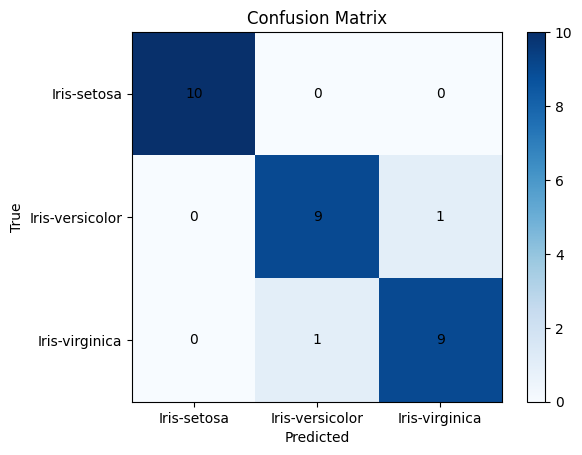

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1,2], le.classes_)
plt.yticks([0,1,2], le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()

# Save the model 

In [15]:
import joblib

joblib.dump(model, "iris_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']